<a href="https://colab.research.google.com/github/Pedro0927/CienciaDatos-MASDI/blob/main/Seccion_1/Ejemplo_1-mall_customers_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/ynykrk7j)

## Introducción

En este notebook, vamos a explorar cómo cargar un dataset utilizando la biblioteca de Python, Pandas. Pandas es una herramienta poderosa que nos permite manipular y analizar datos de manera eficiente.

Para ilustrar este proceso, utilizaremos un dataset de clustering de clientes. Este dataset contiene información sobre los clientes de un centro comercial. El centro comercial quiere segmentar a sus clientes en grupos, para poder crear campañas de marketing dirigidas a grupos específicos de clientes.

A continuación, se muestra cómo cargar este dataset en un DataFrame de Pandas.

> **Nota:** Cambiar la ruta del archivo de acuerdo a la ubicación en su computadora.

In [14]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [15]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())
dir_root

'/'

In [36]:
# Importamos la biblioteca pandas
import pandas as pd

# Cargamos el dataset
data = pd.read_csv("/content/ACT_2.csv", encoding='latin-1')

# Mostramos las primeras 5 filas del dataset
data.head()

,FECHA,DEPARTAMENTO,GENERO,EDUCACION,EDAD,TEMAS,MOTIVO,RANGO_EDADES
0,11-10-2024,BOGOTÁ,Hombre,Bachiller,18,Atención en Salud,Citas Médicas,1 a 18
1,09-10-2024,BOGOTÁ,Hombre,Bachiller,18,Atención en Salud,Citas Médicas,1 a 18
2,09-10-2024,BOGOTÁ,Hombre,Bachiller,18,Atención en Salud,Citas Médicas,1 a 18
3,07-10-2024,SUCRE,Hombre,Bachiller,18,Atención en Salud,Citas Médicas,1 a 18
4,07-10-2024,BOGOTÁ,Hombre,Bachiller,18,Atención en Salud,Citas Médicas,1 a 18


## Exploranción del DataFrame

Una vez que el dataset se ha cargado en un DataFrame de Pandas, podemos explorar el dataset utilizando varias funciones de Pandas.


### 1. Obtener información sobre el DataFrame

De esta manera, podemos ver el número de filas y columnas que contiene el DataFrame, junto con el tipo de datos que contiene cada columna.

Lo cual nos permite responder preguntas como:

* ¿Cuántas filas y columnas hay en el DataFrame?
* ¿Qué tipo de datos contiene cada columna?
* ¿Hay valores faltantes en el DataFrame?
* ¿Qué columnas o filas contienen valores faltantes?
* ¿Qué columnas contienen valores numéricos?
* ¿Qué columnas contienen valores no numéricos?
* ¿Qué columnas pueden ser características?
* ¿Qué columna contiene la variable objetivo?


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4792 entries, 0 to 4791
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA         4792 non-null   object
 1   DEPARTAMENTO  4792 non-null   object
 2   GENERO        4792 non-null   object
 3   EDUCACION     4792 non-null   object
 4   EDAD          4792 non-null   int64 
 5   TEMAS         4792 non-null   object
 6   MOTIVO        4792 non-null   object
 7   RANGO_EDADES  4792 non-null   object
dtypes: int64(1), object(7)
memory usage: 299.6+ KB


### 2. Obtener estadísticas descriptivas del DataFrame

Es posible utilizar la función `describe()` para obtener estadísticas descriptivas del DataFrame.

Esto nos permite responder preguntas como:

* ¿Cuál es el valor mínimo en una columna?
* ¿Cuál es el valor máximo en una columna?
* ¿Cuál es el valor medio en una columna?
* ¿Cuál es la desviación estándar en una columna?
* ¿Cuál es el valor mínimo en una fila?
* ¿Cuál es el valor máximo en una fila?
  

In [38]:
data.describe()

,EDAD
count,4792.000000
mean,53.013147
std,16.241461
min,18.000000
25%,42.000000
50%,53.000000
75%,66.000000
max,92.000000


### 3. Verificar si hay valores faltantes

Es posible utilizar la función `isnull()` para verificar si hay valores faltantes en el DataFrame.

In [39]:
data.isnull().sum()

,0
FECHA,0
DEPARTAMENTO,0
GENERO,0
EDUCACION,0
EDAD,0
TEMAS,0
MOTIVO,0
RANGO_EDADES,0


### 4. Explorar la correlación entre las columnas

En un problema de clustering, es importante explorar la correlación entre las columnas. Esto nos permite responder preguntas como:

* ¿Qué columnas están altamente correlacionadas?
* ¿Qué columnas están débilmente correlacionadas?
* ¿Qué columnas no están correlacionadas?
* ¿Qué columnas son las más importantes para el problema de clustering?
* ¿Qué columnas son las menos importantes para el problema de clustering?
* ¿Qué columnas pueden ser eliminadas del DataFrame?
* ¿Qué columnas pueden ser características?
  

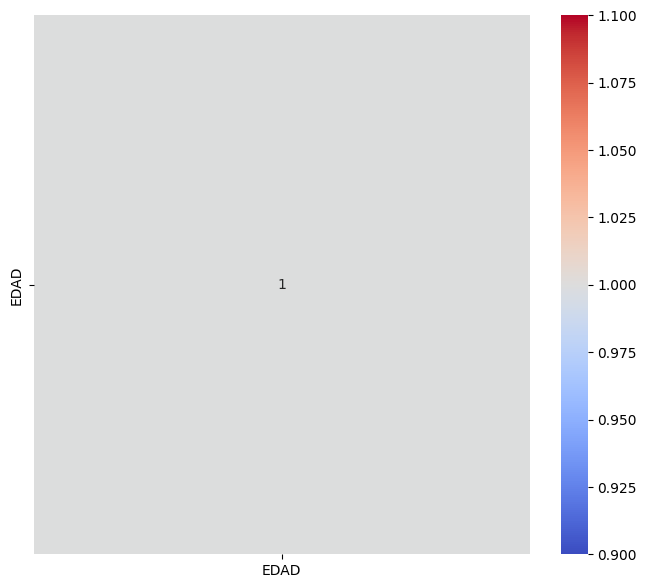

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
# Suponiendo que 'data' es tu DataFrame
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(8,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 5. Explorar la distribución de las columnas

Es posible utilizar la función `hist()` para explorar la distribución de las columnas numéricas.

Esto nos permite responder preguntas como:

* ¿Qué columnas tienen una distribución normal?

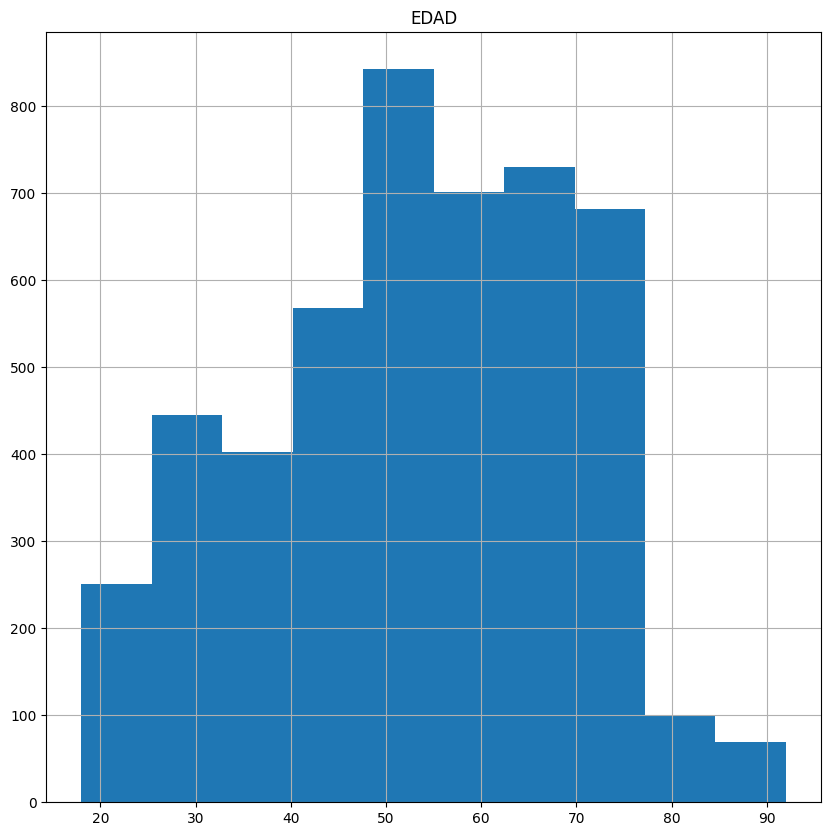

In [41]:
data.hist(figsize=(10, 10))
plt.show()

### 6. Explorar la distribución de las variables categóricas

Es posible utilizar la función `value_counts()` para explorar la distribución de las variables categóricas.

Esto nos permite responder preguntas como:

* ¿Cuántas categorías hay en una columna?
* ¿Cuántas filas pertenecen a cada categoría en una columna?


In [43]:
data["GENERO"].value_counts()

,count
GENERO,
Mujer,3149
Hombre,1640
No Indica,3


<ipython-input-48-1ff0689d8488>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['GENERO'], sort = True)


Text(0.5, 0, 'GENERO')

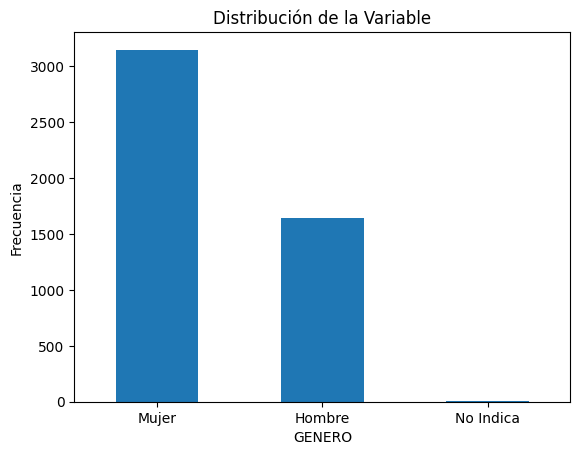

In [48]:
# Visualizar la distribución de variables categóricas
count_classes = pd.value_counts(data['GENERO'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de la Variable")
plt.ylabel("Frecuencia")
plt.xlabel("GENERO")

##Analisis de edades


<ipython-input-46-96bbe24c4d7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='EDAD', y='EDUCACION', inner='box', palette='Dark2')


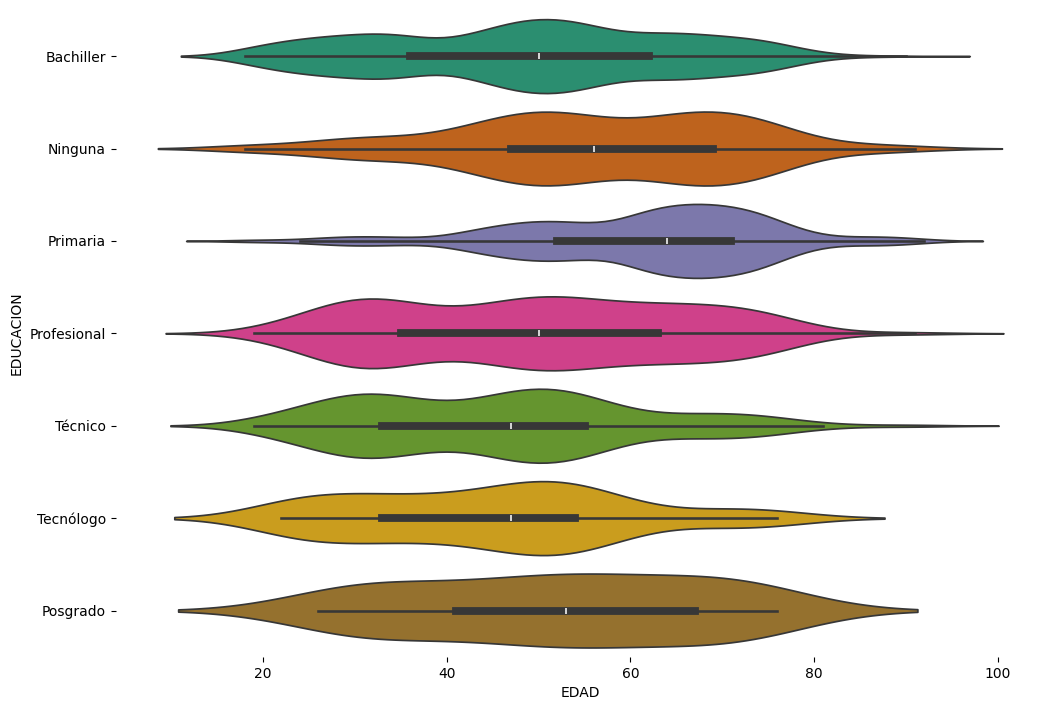

In [46]:
# @title EDUCACION vs EDAD

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['EDUCACION'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='EDAD', y='EDUCACION', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

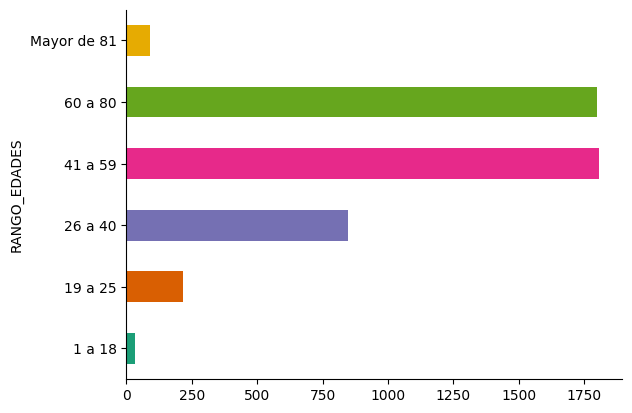

In [47]:
# @title RANGO_EDADES

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('RANGO_EDADES').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)